## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Walkthrough

In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [1]:
params = ExMAS.utils.get_config('ExMAS/data/configs/ams-config-1.json') # load the default 

NameError: name 'ExMAS' is not defined

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [5]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [6]:
inData = ExMAS.utils.generate_demand(inData, params)

### run

15-03-21 15:21:07-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
15-03-21 15:21:07-INFO-creating combinations
15-03-21 15:21:07-INFO-39800	 nR*(nR-1)
15-03-21 15:21:07-INFO-10237	departure compatibility
15-03-21 15:21:07-INFO-5042	origins shareability
15-03-21 15:21:07-INFO-1184	utility for i
15-03-21 15:21:07-INFO-335	utility for j
15-03-21 15:21:08-INFO-209	LIFO pairs
15-03-21 15:21:08-INFO-Reduction of feasible pairs by 99.47%


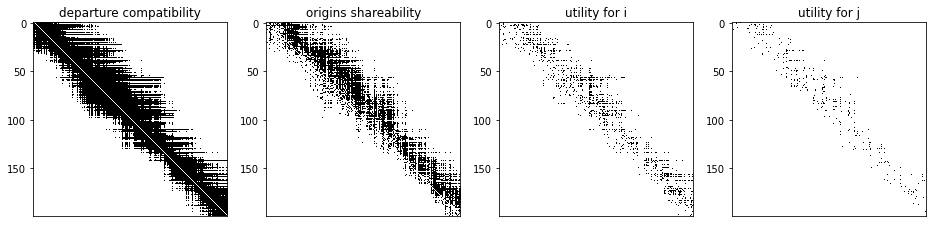

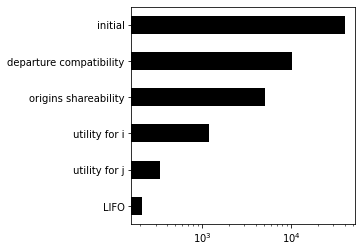

15-03-21 15:21:09-INFO-Degree 2 	Completed
15-03-21 15:21:09-INFO-trips to extend at degree 2 : 544
15-03-21 15:21:10-INFO-At degree 2 feasible extensions found out of 108 searched
15-03-21 15:21:10-INFO-Degree 3 	Completed
15-03-21 15:21:10-INFO-trips to extend at degree 3 : 108
15-03-21 15:21:10-INFO-At degree 3 feasible extensions found out of 16 searched
15-03-21 15:21:10-INFO-Degree 4 	Completed
15-03-21 15:21:10-INFO-trips to extend at degree 4 : 16
15-03-21 15:21:10-INFO-At degree 4 feasible extensions found out of 0 searched
15-03-21 15:21:10-INFO-Degree 5 	Completed
15-03-21 15:21:10-INFO-No more trips to exted at degree 5
15-03-21 15:21:11-INFO-Matching 200 trips to 868 rides in order to minimize u_veh


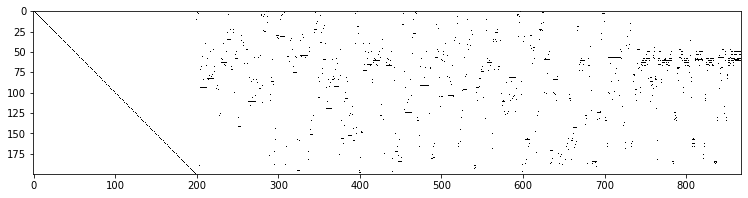

15-03-21 15:21:12-INFO-Problem solution: Optimal. 
Total costs for single trips:         63,796 
reduced by matching to:               50,992
15-03-21 15:21:12-INFO-Calculations  completed
15-03-21 15:21:12-INFO-DotMap(VehHourTrav=50422, VehHourTrav_ns=63796, PassHourTrav=72088, PassHourTrav_ns=63796, PassUtility=946.98675, PassUtility_ns=989.972, mean_lambda=0.2716452742123687, revenue_s=66985.8, revenue_ns=95694.0, Fare_Discount=-0.3, nR=200, SINGLE=80, PAIRS=38, TRIPLES=12, QUADRIPLES=2, QUINTETS=0, PLUS5=0, shared_ratio=0.6, fleet_size_nonshared=28.0, fleet_size_shared=21.0, lambda_shared=0.2716452742123687)


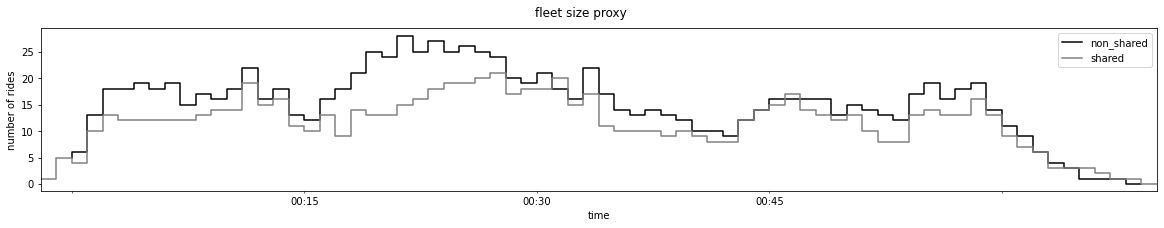

In [7]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [8]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,50422,total travel time of vehicles (with travellers...
VehHourTrav_ns,63796,as above yet in non-shared scenarion
PassHourTrav,72088,total travel time of passengers
PassHourTrav_ns,63796,as above yet in non-shared scenarion
PassUtility,946.987,total (dis)utility of passengers
PassUtility_ns,989.972,as above yet in non-shared scenarion
mean_lambda,0.271645,mean vehicle cost reduction (lambda) over shar...
revenue_s,66985.8,total fares paid by travellers sharing
revenue_ns,95694,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


 all feasible rides

In [9]:
inData.sblts.rides.sample(3)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
388,"[128, 153]",11.5325,821,20,"[5.6377999999999995, 5.894699999999999]","[2237.0, 404, 20, 382]","[128, 153]","[128, 153]",2.0,388,-0.066234,770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
45,[45],6.8445,441,1,[6.8445],"[870, 441]",[45],[45],1.0,45,0.300000,441,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
83,[83],6.0140,388,1,[6.013999999999999],"[1414, 388]",[83],[83],1.0,83,0.300000,388,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


ride 

In [10]:
ride =inData.sblts.rides.sample(1).T
ride['d'] = ExMAS.utils.rides_DESCRIPTIONS
ride.columns = ['ride', 'description']
ride

,ride,description
indexes,[65],travellers indexes
u_pax,3.8145,total (dis)utility of travellers (eq. 4 from t...
u_veh,246,total (dis)utility of vehicle (ride time) [s]
kind,1,"type of a trip (1 - single rides, 2* rides of ..."
u_paxes,[3.8145],(dis) utilities of consecutive travellers
times,"[1174, 246]",sequence of times [first pickup (seconds of si...
indexes_orig,[65],indexes of consequently picked up travellers
indexes_dest,[65],indexes of consequenctly droped off travellers
degree,1,degree (number of travellers)
index,65,id


selected rides in the solution

In [11]:
inData.sblts.schedule.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
199,[199],4.1645,268,1,[4.1645],"[3581, 268]",[199],[199],1,199,0.30000,268,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
179,[179],6.0045,387,1,[6.0045],"[3319, 387]",[179],[179],1,179,0.30000,387,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
477,"[74, 92]",9.3163,533,20,"[3.8832499999999994, 5.43305]","[1382.0, 111, 155, 252]","[74, 92]","[74, 92]",2,477,0.11755,604,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
51,[51],3.7230,240,1,[3.723],"[1032, 240]",[51],[51],1,51,0.30000,240,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
109,[109],1.9930,128,1,[1.9929999999999999],"[1868, 128]",[109],[109],1,109,0.30000,128,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


trips with parameters of the shared ride

In [12]:
inData.sblts.requests.sample(5)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
187,105,44846575,44824147,3426,NaN,110,2021-03-15 15:41:50,NaN,880,105,0.0035,61.648352,1.705,999999,187,110,1.705000,1,0
100,159,479606973,44802443,1708,NaN,164,2021-03-15 15:20:30,NaN,1318,159,0.0035,92.505495,2.551,999999,100,164,2.551000,1,0
0,3,1530303594,44815831,0,NaN,327,2021-03-15 15:13:45,NaN,2621,3,0.0035,183.758242,5.076,999999,699,327,4.808650,21,1
186,97,484705817,1571091924,3418,NaN,268,2021-03-15 16:02:50,NaN,2148,97,0.0035,150.593407,4.160,999999,837,322,4.104975,31,1
137,22,1421472376,3452839332,2410,NaN,182,2021-03-15 15:34:32,NaN,1458,22,0.0035,102.197802,2.824,999999,252,203,2.609250,20,0


In [13]:
trip =inData.sblts.requests.sample(1).T
trip['d'] = ExMAS.utils.trips_DESCRIPTIONS
trip.columns = ['ride', 'description']
trip

,ride,description
index,78,id
origin,44846571,origin node (OSM index)
destination,1413910861,destination node (OSM index)
treq,3240,desired departure time
tdep,NaN,"[deprecated, from MaaSSim]"
ttrav,201,travel time [s] (shortest)
tarr,2021-03-15 15:50:53,desired arrival time (pd.datetime)
tdrop,NaN,"[deprecated, from MaaSSim]"
dist,1609,distance in meters (shortest)
pax_id,78,id


---
(c) Rafał Kucharski, Delft, 2020